In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display 
from sklearn.model_selection import train_test_split 
import lightgbm as lgb


In [46]:
def dateparse(d):
    return pd.to_datetime(d)

In [69]:
df = pd.read_csv(os.path.join(os.getcwd(), '../data/', 'trainset_full.csv'),
                        encoding= 'unicode_escape', low_memory=False, parse_dates=['measured_at'], date_parser=dateparse)
df = df.drop(columns=['index','measured_at'])
#df['error'] = (df['error_category'] != 'NO_ERROR').astype(int)


In [26]:
def store_back(df, name):
        df.to_csv('data/' + name + '.csv', index=False)

In [27]:
df['error'] = (df['error_category'] != 'O_ERROR').astype(int)

In [70]:
#df['error'] = 0
err = {'error_category': {'ERROR=12':1, 'ERROR=17':2, 'ERROR=3':3, 'ERROR=5': 4, 'ERROR=19': 5, 'ERROR=24':6, 
                          'ERROR=28':7, 'ERROR=8': 8, 'ERROR=20':9, 'ERROR=31':10, 'ERROR=30':11, 'ERROR=22':12,
                          'ERROR=25':13, 'ERROR=7':14, 'ERROR=27':15, 'ERROR=29':16, 'ERROR=23':17, 'NO_ERROR':0}}
df = df.replace(err)




In [29]:
params1 = {
    'n_estimators': 1000,
    'colsample_bytree':0.8,
    #"early_stopping_rounds":[10], 
    'objective': 'binary',
    'max_depth': 10,
    'num_leaves': 100,
    'metric' : 'logloss',
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    'learning_rate':0.1,
    #'is_unbalance': ['True']
    'scale_pos_weight':10,
    #'min_split_gain': [0.3, 0.4],
    'subsample': 0.9,
    #'subsample_freq': [20]
}

In [72]:
#y1 = df.error
y2 = df.error_category

In [73]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.set_params(**params1)

X_train, X_test, y_train, y_test = train_test_split(df,
                                                                   y2, #binary !
                                                                   #stratify=y1,
                                                                   test_size=0.2,
                                                                   random_state=11) 


In [40]:
X_train_multi = X_train_bin.query('error_category != -1') #only multiclass components 
y_train_multi = X_train_multi.error_category
y_test_multi = X_test.error_category[(X_test.error_category != -1)]

In [37]:
model.fit(X_train_bin,y_train_bin) # fit binary components

LGBMClassifier(colsample_bytree=0.8, max_depth=10, metric='logloss',
               n_estimators=1000, num_leaves=100, objective='binary',
               scale_pos_weight=10, subsample=0.9)

In [39]:
y_pred_bin = model.predict_proba(X_test)

In [40]:
indices = np.argmax(y_pred_bin, axis=1)

In [43]:
X_test = X_test[indices == 1] #find binary components from test set, use  b   it for multiclass 

In [79]:
params2 = {
            'boosting_type': 'gbdt',
            'objective': 'multiclass',
            'num_class':18,
            'subsample': 0.5,
            'subsample_freq': 1,
            'learning_rate': 0.03,
            #'num_leaves': 2**11-1,
            'min_data_in_leaf': 1,
            'feature_fraction': 0.5,
            'max_bin': 100,
            'n_estimators': 5000,
            'boost_from_average': False,
            "random_seed":42}

In [ ]:
X_train = X_train.drop(columns=['error_category'])
X_test = X_test.drop(columns=['error_category'])

In [65]:
X_train.error_category.value_counts()

Index(['turbine_id', 'wind_speed', 'power', 'nacelle_direction',
       'wind_direction', 'rotor_speed', 'generator_speed', 'temp_environment',
       'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi', 'blade_angle_avg',
       'hydraulic_pressure', 'park_id'],
      dtype='object')

In [81]:
train_data = lgb.Dataset(data=X_train, #train multi class,
                         label=y_train,
                         free_raw_data=False)


In [82]:
model_gbm = lgb.train(params2, train_data, # valid_sets=[valid_data],
                  num_boost_round=500, # early_stopping_rounds=50,
                  verbose_eval=25)

C:\Users\PMoes\AppData\Roaming\Python\Python310\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\PMoes\AppData\Roaming\Python\Python310\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2159
[LightGBM] [Info] Number of data points in the train set: 1093752, number of used features: 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Exception ignored on calling ctypes callback function: <function _log_callback at 0x00000245F6BFB490>
Traceback (most recent call last):
  File "C:\Users\PMoes\AppData\Roaming\Python\Python310\site-packages\lightgbm\basic.py", line 91, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
lgb.plot_metric(model_gbm)

In [301]:
X_test_final = X_test_final.drop(columns='error_category')

In [343]:
pred = model_gbm.predict(X_test, raw_score=True)

In [303]:
pred_final = np.argmax(pred, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [304]:
from sklearn import metrics 
#print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's f1: {metrics.f1_score(y_test_final, pred_final, average='micro'):.5f}")
#print(f"Test's AUPRC: {metrics.average_precision_score(y_test, y_pred):.5f}")

Test's f1: 0.98274


In [32]:
from sklearn import metrics
def confusion_matrix(y_test, y_pred):
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [0,1], columns=[0,1])
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

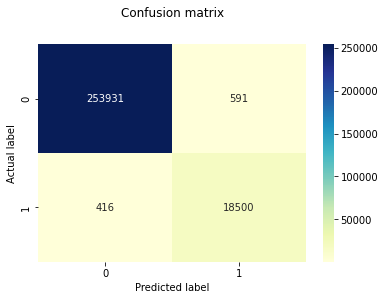

In [33]:
confusion_matrix(y_test,y_pred2)

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model_gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

AttributeError: 'Booster' object has no attribute 'feature_importances_'